In [2]:
from rdflib import Graph
import re
import pandas as pd
from rdflib import Graph, URIRef, Namespace, Literal
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

In [552]:
graph = Graph()

In [3]:
graph.parse('')

<Graph identifier=Ncb1472c75e544ed6912edab1c2124442 (<class 'rdflib.graph.Graph'>)>

In [4]:
graph.serialize('')

<Graph identifier=Ncb1472c75e544ed6912edab1c2124442 (<class 'rdflib.graph.Graph'>)>

In [5]:
wikia = 'http://dbkwik.webdatacommons.org/starwars.wikia.com'
dbpedia = 'http://dbkwik.webdatacommons.org/swtor.wikia.com'
match_list = list()

for sub, pred, obj in graph:
    obj_text = str(obj)
    if wikia in obj_text:
        for s, p, o in graph.triples((sub, None, None)):
            o_text = str(o)
            if dbpedia in o_text:
                match_list.append({'e1': obj_text,
                                 'e2': o_text})
                break

In [6]:
match_list

[{'e1': 'http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Yozusk',
  'e2': 'http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Yozusk'},
 {'e1': 'http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Argog',
  'e2': 'http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Argog'},
 {'e1': 'http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Kabbura',
  'e2': 'http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Kabbura'},
 {'e1': 'http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Briqui',
  'e2': 'http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Briqui'},
 {'e1': 'http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Garus',
  'e2': 'http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Garus'},
 {'e1': 'http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Salus_Bralor',
  'e2': 'http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Salus_Bralor'},
 {'e1': 'http://dbkwik.webdatacommons.org/starwars.wik

In [7]:
len(match_list)

1429

In [8]:
match_df = pd.DataFrame(match_list)

In [9]:
match_df

,e1,e2
0,http://dbkwik.webdatacommons.org/starwars.wiki...,http://dbkwik.webdatacommons.org/swtor.wikia.c...
1,http://dbkwik.webdatacommons.org/starwars.wiki...,http://dbkwik.webdatacommons.org/swtor.wikia.c...
2,http://dbkwik.webdatacommons.org/starwars.wiki...,http://dbkwik.webdatacommons.org/swtor.wikia.c...
3,http://dbkwik.webdatacommons.org/starwars.wiki...,http://dbkwik.webdatacommons.org/swtor.wikia.c...
4,http://dbkwik.webdatacommons.org/starwars.wiki...,http://dbkwik.webdatacommons.org/swtor.wikia.c...
...,...,...
1424,http://dbkwik.webdatacommons.org/starwars.wiki...,http://dbkwik.webdatacommons.org/swtor.wikia.c...
1425,http://dbkwik.webdatacommons.org/starwars.wiki...,http://dbkwik.webdatacommons.org/swtor.wikia.c...
1426,http://dbkwik.webdatacommons.org/starwars.wiki...,http://dbkwik.webdatacommons.org/swtor.wikia.c...
1427,http://dbkwik.webdatacommons.org/starwars.wiki...,http://dbkwik.webdatacommons.org/swtor.wikia.c...


In [10]:
#match_df.to_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/sw-tor-gold.csv')

In [465]:
match_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/starwars-swg-gold.csv')


In [466]:
match_df

,Unnamed: 0,e1,e2
0,0,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Su,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Su_(card)
1,1,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Temple_of_the_Blueleaf_Cluster,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Temple_of_the_Blueleaf
2,2,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Gungan_Warrior_Stronghold,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Gungan_Warrior_Stronghold
3,3,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Booster_Blue,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Booster_Blue_(Schematic)
4,4,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/The_Wrath_of_IG-88,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/The_Wrath_of_IG-88
...,...,...,...
1116,1116,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Walker_Luskeske,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Walker_Luskeske
1117,1117,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Squill_Cave,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Squill_Cave
1118,1118,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Cloak_of_Hate,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Cloak_of_Hate
1119,1119,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Allya%27s_Redemption,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Allya%27s_Redemption


In [467]:
generated_df = pd.read_csv(
    '/Users/yamamotobikutorueiichi/codes/custom_paris/both func and func inv method/sww-swg/entity_sim_9.csv')

#generated_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/paris/sww-swg/9_eqv_full.tsv', sep='\t', names=['e1', 'e2', 'sim'])

#generated_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/knowledgegraph-alignments-4/marvelcinematicuniverse-marvel/BaselineAltLabel/systemAlignment.csv')


In [468]:
generated_df.sort_values('sim', ascending=False)

,Unnamed: 0,e1,e2,sim
0,0,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Luck,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Luck,0.950000
40899,40899,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Star_Wars_68:_The_Search_Begins,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/The_Search_Begins,0.950000
31869,31869,http://starwars.wikia.com/wiki/Special:FilePath/Murra.jpg,http://swg.wikia.com/wiki/Special:FilePath/Murra.jpg,0.950000
35172,35172,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/YKL-37R_Nova_Courier,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Nova_Courier,0.950000
41925,41925,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Bothan,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Bothan,0.950000
...,...,...,...,...
1748633,1748633,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Southview_Village,http://swg.wikia.com/wiki/Special:FilePath/SullustanFrontThumb.jpg?width=300,0.010063
1748632,1748632,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Southview_Village,http://swg.wikia.com/wiki/Special:FilePath/Wookiee_g.jpg?width=300,0.010063
1748631,1748631,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Southview_Village,http://swg.wikia.com/wiki/Special:FilePath/Trando_g.jpg?width=300,0.010063
1748630,1748630,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Southview_Village,http://swg.wikia.com/wiki/Special:FilePath/Bothanmale.jpg?width=300,0.010063


In [469]:
resource_generated_df = generated_df[generated_df['e1'].str.contains('/resource/')]

In [470]:
resource_generated_df

,Unnamed: 0,e1,e2,sim
0,0,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Luck,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Luck,0.950000
1,1,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Luck,http://www.w3.org/2002/07/owl#Thing,0.422244
2,2,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Luck,http://dbkwik.webdatacommons.org/swg.wikia.com/class/wookieepedia,0.654522
3,3,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Luck,http://dbkwik.webdatacommons.org/swg.wikia.com/class/ship,0.834354
4,4,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Luck,http://swg.wikia.com/wiki/Special:FilePath/Bracelet_of_Heroism_-_Right.jpg?width=300,0.437448
...,...,...,...,...
1756093,1756093,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Nuala_Marauders,http://swg.wikia.com/wiki/Special:FilePath/Restuss-phase3rebdrop.jpg,0.011114
1756094,1756094,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Belderone_Imperial_naval_base,http://swg.wikia.com/wiki/Special:FilePath/Buffstack.jpg?width=300,0.035364
1756095,1756095,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Belderone_Imperial_naval_base,http://www.w3.org/2002/07/owl#Thing,0.011789
1756096,1756096,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Desperate_Circumstances,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Sand_People,0.058537


In [471]:
threshold_generated_df = resource_generated_df[resource_generated_df['sim'] > 0.8]

In [472]:
threshold_generated_df

,Unnamed: 0,e1,e2,sim
0,0,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Luck,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Luck,0.950000
3,3,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Luck,http://dbkwik.webdatacommons.org/swg.wikia.com/class/ship,0.834354
10,10,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Outcast,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Outcasts,0.950000
26,26,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Aveso_Ars,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Outcasts,0.950000
27,27,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Rhiek_Okina,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Outcasts,0.950000
...,...,...,...,...
1754543,1754543,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Telaris,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Structures,0.805183
1755136,1755136,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Ailon_system,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Dexen_Eronoss,0.801656
1755168,1755168,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Fitomp,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Bofa_Treat,0.819916
1755169,1755169,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Fitomp,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Travel_Biscuits,0.810722


In [473]:
result_df = pd.merge(threshold_generated_df, match_df, left_on=['e1', 'e2'], right_on=['e1', 'e2'])

In [474]:
pd.set_option('display.max_colwidth', None)


In [475]:
result_df

,Unnamed: 0_x,e1,e2,sim,Unnamed: 0_y
0,162,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Frelka,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Frelka,0.950000,992
1,242,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Aaph_Koden,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Aaph_Koden,0.950000,1090
2,260,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Deep_Sea,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Deep_Sea,0.950000,628
3,279,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Erriya,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Erriya,0.950000,65
4,289,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Spined_Rancor_Poster,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Spined_Rancor_Poster,0.950000,855
...,...,...,...,...,...
896,870608,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Bloodguard,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Death_Watch_Bloodguard,0.839879,462
897,870864,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Zicx-bug_bomb,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Zicx_Bug_Bomb_quest,0.826787,838
898,886685,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/D%27krn,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Commander_D%27Krn,0.864599,454
899,887290,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Galactic_Gathering_House_Painting,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Galactic_Gathering_2011_(painting),0.807154,445


In [476]:
len(result_df)

901

In [477]:
#one_to_one_df = threshold_generated_df.sort_values('sim', ascending=False).drop_duplicates('e1').drop_duplicates('e2')
#one_to_one_df = threshold_generated_df.sort_values('sim', ascending=False)
#one_to_one_df = resource_generated_df.sort_values('sim', ascending=False).drop_duplicates('e1').drop_duplicates('e2')
#one_to_one_df = resource_generated_df.sort_values('sim', ascending=False).drop_duplicates('e1')
#one_to_one_df = resource_generated_df


In [478]:
resource_generated_df = resource_generated_df[~resource_generated_df['e1'].str.contains('Category:') &
                                            ~resource_generated_df['e2'].str.contains('Category:')]

In [464]:
search_df = resource_generated_df.copy().sort_values('sim', ascending=False)

search_df[search_df['e2'] == 'http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Luke_Cage%27s_Bar']

,Unnamed: 0,e1,e2,sim
122495,122495,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Mike%27s_Beer,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Luke_Cage%27s_Bar,0.784313
76350,76350,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Luke%27s,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Luke_Cage%27s_Bar,0.767310
98079,98079,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Rosie%27s_Desert_Oasis,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Luke_Cage%27s_Bar,0.735428
122492,122492,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Buck%27s,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Luke_Cage%27s_Bar,0.733036
122493,122493,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Neptune%27s_Net,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Luke_Cage%27s_Bar,0.729742
122482,122482,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Goldbrix_Tavern,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Luke_Cage%27s_Bar,0.720868
122494,122494,http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Three_Roads_Bar,http://dbkwik.webdatacommons.org/marvel.wikia.com/resource/Luke_Cage%27s_Bar,0.699706


search_df = resource_generated_df.copy().sort_values('sim', ascending=False)

unique_e1_list = search_df['e1'].drop_duplicates().tolist()
mapping_list = list()

for e1 in tqdm(unique_e1_list):
    if e1 not in search_df['e1'].values:
        continue
    row = search_df[search_df['e1'] == e1].iloc[0]
    e2 = row['e2']
    mapping_list.append({
        'e1': e1,
        'e2': e2,
        'sim': row['sim']
    })
    
    search_df = search_df[search_df['e1'] != e1]
    search_df = search_df[search_df['e2'] != e2]

In [479]:
search_df = resource_generated_df.copy().sort_values('sim', ascending=False)

unique_e1_list = search_df['e1'].drop_duplicates().tolist()
mapping_list = list()

for e1 in tqdm(unique_e1_list):
    if e1 not in search_df['e1'].values:
        continue
    
    
    e1_rows = search_df[search_df['e1'] == e1].sort_values('sim', ascending=False)

    row = e1_rows.iloc[0]
    e2 = row['e2']
    max_sim = row['sim']
    mapping_list.append({
        'e1': e1,
        'e2': e2,
        'sim': max_sim
    })
    same_sim_rows = e1_rows[e1_rows['sim'] == max_sim]
    
    if len(same_sim_rows) > 1:
        for _, same_sim_row in same_sim_rows.iterrows():
            mapping_list.append({
                'e1': e1,
                'e2': same_sim_row['e2'],
                'sim': max_sim
            })
    
    search_df = search_df[search_df['e1'] != e1]
    search_df = search_df[(search_df['e2'] != e2) | (search_df['sim'] >= max_sim)]

  0%|          | 0/85888 [00:00<?, ?it/s]

In [480]:
one_to_one_df = pd.DataFrame(mapping_list)

In [168]:
one_to_one_df.to_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/both func and func inv method/mcu-marvel-without-alt-label/one_to_one.csv')



In [481]:
one_to_one_df.to_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/both func and func inv method/sww-swg/multi_filter.csv')


In [169]:
#one_to_one_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/new-all-attribute/mcu-marvel/one_to_one.csv')

In [482]:
len(one_to_one_df)

31425

In [483]:
threshold_one_to_one_df = one_to_one_df[one_to_one_df['sim'] > 0.84]

In [484]:
threshold_one_to_one_df

,e1,e2,sim
0,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Luck,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Luck,0.950000
1,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Science_Outpost,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Dathomir_Science_Outpost,0.950000
2,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Didina_Lippinoss,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Didina_Lippinoss,0.950000
3,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Ronin_Lightrunner,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Ronin_Lightrunner,0.950000
4,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Fixer_One,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Fixer_One,0.950000
...,...,...,...
3415,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Circus_Horrificus/Legends,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Circus_Horrificus_Auto_Beast_Feeder,0.840757
3416,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Pirate_Bunker,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Rebel_Slayer,0.840715
3420,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/JT-12_jetpack/Legends,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Merr-Sonn_JT-12_Jetpack_Blueprints,0.840585
3425,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Cheese,http://dbkwik.webdatacommons.org/swg.wikia.com/class/cleanup,0.840492


In [485]:
result_df = pd.merge(threshold_one_to_one_df, match_df, left_on=['e1', 'e2'], right_on=['e1', 'e2'])

In [486]:
result_df

,e1,e2,sim,Unnamed: 0
0,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Science_Outpost,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Dathomir_Science_Outpost,0.950000,365
1,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Didina_Lippinoss,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Didina_Lippinoss,0.950000,762
2,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Ronin_Lightrunner,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Ronin_Lightrunner,0.950000,854
3,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Fixer_One,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Fixer_One,0.950000,1027
4,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Geonosian_Bio-Lab,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Geonosian_Caves,0.950000,504
...,...,...,...,...
846,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Rihkxyrk_assault_fighter,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/TransGalMeg_%22Rihkxyrk%22_Attack_Ship,0.851805,299
847,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Ezkiel,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Brother_Ezkiel,0.850561,582
848,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Rikkh,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Captain_Rikkh,0.843276,498
849,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Lok_Marathon,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Lok_Marathon_Race,0.842823,858


In [487]:
match_resource_df = match_df[match_df['e1'].str.contains('/resource/')]

In [488]:
match_resource_df

,Unnamed: 0,e1,e2
0,0,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Su,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Su_(card)
1,1,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Temple_of_the_Blueleaf_Cluster,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Temple_of_the_Blueleaf
2,2,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Gungan_Warrior_Stronghold,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Gungan_Warrior_Stronghold
3,3,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Booster_Blue,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Booster_Blue_(Schematic)
4,4,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/The_Wrath_of_IG-88,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/The_Wrath_of_IG-88
...,...,...,...
1116,1116,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Walker_Luskeske,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Walker_Luskeske
1117,1117,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Squill_Cave,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Squill_Cave
1118,1118,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Cloak_of_Hate,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Cloak_of_Hate
1119,1119,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Allya%27s_Redemption,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Allya%27s_Redemption


In [489]:
resource_generated_df = one_to_one_df

In [490]:
match_set = set(zip(match_resource_df['e1'], match_resource_df['e2']))
resource_generated_df['Predicted'] = False
resource_generated_df['Analyzed'] = False
analyzed_e1_set = set(match_resource_df['e1'])
analyzed_e2_set = set(match_resource_df['e2'])


for index, row in tqdm(resource_generated_df.iterrows(), total=len(resource_generated_df)):
    e1 = row['e1']
    e2 = row['e2']
    
    if (e1, e2) in match_set:
        resource_generated_df.at[index, 'Predicted'] = True
    
    if e1 in analyzed_e1_set or e2 in analyzed_e2_set:
        resource_generated_df.at[index, 'Analyzed'] = True

  0%|          | 0/31425 [00:00<?, ?it/s]

In [491]:
false_positive_df = resource_generated_df[(resource_generated_df['Analyzed'] == True) & (resource_generated_df['Predicted'] == False)]


In [492]:
resource_generated_df[resource_generated_df['e1'] == 'http://dbkwik.webdatacommons.org/marvelcinematicuniverse.wikia.com/resource/Meet_the_New_Boss']

,e1,e2,sim,Predicted,Analyzed


In [493]:
#false_positive_df.to_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/mcu-marvel-25/false_positive.csv')

In [494]:
def precision_score(df, threshold, left=['e1', 'e2'], only_analyzed=False):
    threshold_df = df[df['sim'] > threshold]
    
    if only_analyzed:
        threshold_df = threshold_df[threshold_df['Analyzed'] == True]
    
    matches = len(threshold_df)
    
    if matches == 0:
        return 0
    
    correct_matches_df = pd.merge(threshold_df, match_df, left_on=left, right_on=['e1', 'e2'])
    
    correct_matches = len(threshold_df[threshold_df['Predicted'] == True])
    
    return correct_matches / matches 

In [495]:
def recall_score(df, total_correct, threshold):
    threshold_df = df[df['sim'] > threshold]
    
    correct_matches = len(threshold_df[threshold_df['Predicted'] == True])

    return correct_matches / total_correct

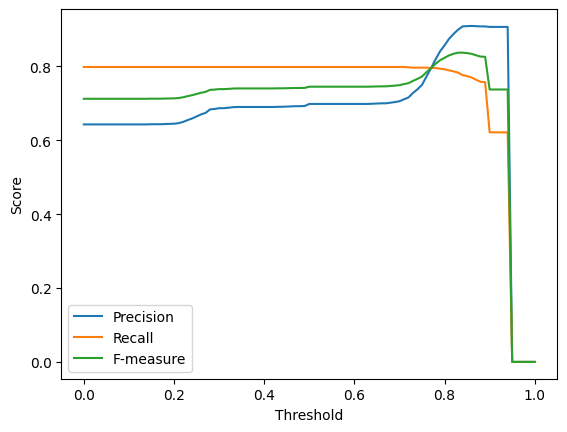

In [496]:
thresholds = np.arange(0, 1.01, 0.01)

total_correct = len(match_resource_df)

precisions = [precision_score(resource_generated_df, t, ['e1', 'e2'], True) for t in thresholds]
recalls = [recall_score(resource_generated_df, total_correct, t) for t in thresholds]
f_measures = []
for precision, recall in zip(precisions, recalls):
    f_measure = 0
    if precision + recall > 0:
        f_measure = 2 * (precision * recall) / (precision + recall)
    f_measures.append(f_measure)
    
# Plot precision, recall, and F-measure
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f_measures, label='F-measure')

# Add labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

plt.savefig('/Users/yamamotobikutorueiichi/codes/custom_paris/mcu-marvel-25/one_to_one.pdf')

# Display the graph
plt.show()

In [497]:
max(f_measures)

0.8371864240039351

In [498]:
# Find the index of the maximum F-measure
max_f_measure_index = np.argmax(f_measures)

# Get the threshold with the maximum F-measure
best_threshold = thresholds[max_f_measure_index]
best_precision = precisions[max_f_measure_index]
best_recall = recalls[max_f_measure_index]

In [499]:
best_precision

0.9082177161152615

In [500]:
best_recall

0.7764598540145985

In [501]:
best_threshold

0.84

In [502]:
max(recalls)

0.7983576642335767

In [2224]:
PATH = '/Users/yamamotobikutorueiichi/codes/custom_paris/'
PARIS_PATH = '/Users/yamamotobikutorueiichi/codes/paris/'
GOLD_STANDARDS = ['ma-mb-gold.csv', 'ma-se-gold.csv', 'mcu-marvel-gold.csv', 'starwars-swg-gold.csv', 'sw-tor-gold.csv']
#GOLD_STANDARDS = ['mcu-marvel-gold.csv']
#GENERATED_MAPPINGS = ['ma-mb', 'ma-se', 'mcu-marvel', 'sww-swg', 'sww-tor']
GENERATED_MAPPINGS = ['ma-mb', 'ma-se-all-labels', 'mcu-marvel-25', 'starwars-swg', 'starwars-swtor']
#GENERATED_MAPPINGS = ['mcu-marvel']


In [2225]:
dataframes = []

for gs in GOLD_STANDARDS:
    df = pd.read_csv(PATH + gs)
    dataframes.append(df)

match_df = pd.concat(dataframes, ignore_index=True)

match_resource_df = match_df[match_df['e1'].str.contains('/resource/')]

In [2226]:
match_resource_df

,Unnamed: 0,e1,e2
0,0,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Death_(comic),http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/Death_(comic)
1,1,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/2188,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/2188
2,2,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Zora,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/Zora
3,3,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/USS_Gorkon,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/USS_Gorkon
4,4,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/The_Tears_of_the_Singers,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/The_Tears_of_the_Singers
...,...,...,...
15356,1424,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Gorse_Bendak,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Bendak_Starkiller
15357,1425,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/House_of_Organa,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/House_Organa
15358,1426,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Theron_Shan,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Theron_Shan
15359,1427,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Karness_Muur,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Karness_Muur


In [2229]:
dataframes = []

for folder in GENERATED_MAPPINGS:
    #df = pd.read_csv(PARIS_PATH + folder + '/9_eqv_full.tsv', sep='\t', names=['e1', 'e2', 'sim'])
    #df = pd.read_csv(PARIS_PATH + folder + '/one_to_one.csv')
    df = pd.read_csv(PATH + folder + '/one_to_one.csv')
    dataframes.append(df)
    
generated_df = pd.concat(dataframes, ignore_index=True)

resource_generated_df = generated_df[generated_df['e1'].str.contains('/resource/')]

#one_to_one_df = resource_generated_df.sort_values('sim', ascending=False).drop_duplicates('p1').drop_duplicates('p2')

#resource_generated_df = one_to_one_df

In [2230]:
resource_generated_df

,Unnamed: 0,e1,e2,sim,Predicted,Analyzed
0,0,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Time_travel,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/Time_travel,0.950000,NaN,NaN
1,1,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/USS_Enterprise_(NCC-1701-D),http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/USS_Enterprise_(NCC-1701-D),0.950000,NaN,NaN
2,2,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Benjamin_Sisko,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/Benjamin_Sisko,0.950000,NaN,NaN
3,3,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Warp_drive,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/Warp_drive,0.950000,NaN,NaN
4,4,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/James_T._Kirk,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/James_T._Kirk,0.950000,NaN,NaN
...,...,...,...,...,...,...
51742,4312,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Death_mark/Legends,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Ability:Deathmark,0.010256,NaN,NaN
51743,4313,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Parasite/Legends,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Ability:Parasitism,0.010256,NaN,NaN
51744,4314,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Sexes,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Young_Mandalorian_Warrior,0.000144,NaN,NaN
51745,4315,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Duro_sector/Legends,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Mission:Crushing_the_Jedi_Freedom_Fighters,0.000000,NaN,NaN


In [2231]:
def calculate_df(match_df, generated_df):
    match_set = set(zip(match_df['e1'], match_df['e2']))
    generated_df['Predicted'] = False
    generated_df['Analyzed'] = False
    analyzed_e1_set = set(match_df['e1'])
    analyzed_e2_set = set(match_df['e2'])

    local_total_correct = len(match_df)

    for index, row in tqdm(generated_df.iterrows(), total=len(generated_df)):
        e1 = row['e1']
        e2 = row['e2']

        if (e1, e2) in match_set:
            generated_df.at[index, 'Predicted'] = True

        if e1 in analyzed_e1_set or e2 in analyzed_e2_set:
            generated_df.at[index, 'Analyzed'] = True
            
    precisions = [precision_score(generated_df, t, ['e1', 'e2'], True) for t in thresholds]
    recalls = [recall_score(generated_df, local_total_correct, t) for t in thresholds]
    f_measures = []
    for precision, recall in zip(precisions, recalls):
        f_measure = 0
        if precision + recall > 0:
            f_measure = 2 * (precision * recall) / (precision + recall)
        f_measures.append(f_measure)
        
    max_f_measure_index = np.argmax(f_measures)

    best_threshold = thresholds[max_f_measure_index]
    

    
    #return generated_df[generated_df['sim'] > best_threshold]
    return generated_df

In [2233]:
dataframes = []

match_pair_list = list(zip(GOLD_STANDARDS, GENERATED_MAPPINGS))
print(match_pair_list)
total_correct = 0

for gs, folder in match_pair_list:
    df = pd.read_csv(PATH + gs)
    match_resource_df = df[df['e1'].str.contains('/resource/')]
    total_correct += len(match_resource_df)
    
    #df = pd.read_csv(PATH + folder + '/one_to_one.csv')
    #df = pd.read_csv(PARIS_PATH + folder + '/one_to_one.csv')
    df = pd.read_csv(PATH + folder + '/entity_sim_9.csv')
    #df = pd.read_csv(PARIS_PATH + folder + '/9_eqv_full.tsv', sep='\t', names=['e1', 'e2', 'sim'])
    resource_generated_df = df[df['e1'].str.contains('/resource/')]
    resource_generated_df = resource_generated_df.sort_values('sim', ascending=False).drop_duplicates('e1').drop_duplicates('e2')


    dataframes.append(calculate_df(match_resource_df, resource_generated_df))

    
resource_generated_df = pd.concat(dataframes, ignore_index=True)

[('ma-mb-gold.csv', 'ma-mb'), ('ma-se-gold.csv', 'ma-se-all-labels'), ('mcu-marvel-gold.csv', 'mcu-marvel-25'), ('starwars-swg-gold.csv', 'starwars-swg'), ('sw-tor-gold.csv', 'starwars-swtor')]


  0%|          | 0/24113 [00:00<?, ?it/s]

  0%|          | 0/7336 [00:00<?, ?it/s]

  0%|          | 0/5324 [00:00<?, ?it/s]

  0%|          | 0/2556 [00:00<?, ?it/s]

  0%|          | 0/4121 [00:00<?, ?it/s]

In [2234]:
resource_generated_df

,Unnamed: 0,e1,e2,sim,Predicted,Analyzed
0,161000,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Time_travel,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/Time_travel,0.950000,False,False
1,274997,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/USS_Enterprise_(NCC-1701-D),http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/USS_Enterprise_(NCC-1701-D),0.950000,True,True
2,282234,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Benjamin_Sisko,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/Benjamin_Sisko,0.950000,False,False
3,215284,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Warp_drive,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/Warp_drive,0.950000,False,False
4,113100,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/James_T._Kirk,http://dbkwik.webdatacommons.org/memory-beta.wikia.com/resource/James_T._Kirk,0.950000,False,False
...,...,...,...,...,...,...
43445,11132,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Death_mark/Legends,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Ability:Deathmark,0.010256,False,False
43446,11128,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Parasite/Legends,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Ability:Parasitism,0.010256,False,False
43447,11160,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Sexes,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Young_Mandalorian_Warrior,0.000144,False,False
43448,11134,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Duro_sector/Legends,http://dbkwik.webdatacommons.org/swtor.wikia.com/resource/Mission:Crushing_the_Jedi_Freedom_Fighters,0.000000,False,False


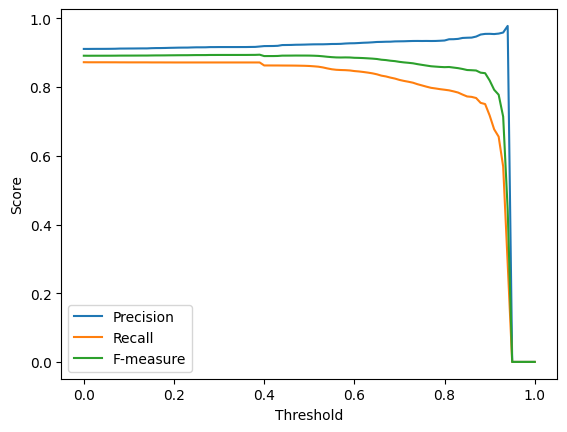

In [2235]:
thresholds = np.arange(0, 1.01, 0.01)

precisions = [precision_score(resource_generated_df, t, ['e1', 'e2'], True) for t in thresholds]
recalls = [recall_score(resource_generated_df, total_correct, t) for t in thresholds]
f_measures = []
for precision, recall in zip(precisions, recalls):
    f_measure = 0
    if precision + recall > 0:
        f_measure = 2 * (precision * recall) / (precision + recall)
    f_measures.append(f_measure)
    
# Plot precision, recall, and F-measure
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f_measures, label='F-measure')

# Add labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

#plt.savefig('/Users/yamamotobikutorueiichi/codes/custom_paris/aggregated_one_to_one.pdf')

# Display the graph
plt.show()

In [2236]:
# Find the index of the maximum F-measure
max_f_measure_index = np.argmax(f_measures)

# Get the threshold with the maximum F-measure
best_threshold = thresholds[max_f_measure_index]
best_precision = precisions[max_f_measure_index]
best_recall = recalls[max_f_measure_index]

In [2237]:

print(best_precision)
print(best_recall)
print(max(f_measures))
print(best_threshold)

0.9181982734614313
0.8717694494018111
0.8943817176957245
0.39


In [1791]:
match_set = set(zip(match_resource_df['e1'], match_resource_df['e2']))
resource_generated_df['Predicted'] = False
resource_generated_df['Analyzed'] = False
analyzed_e1_set = set(match_resource_df['e1'])
analyzed_e2_set = set(match_resource_df['e2'])


for index, row in tqdm(resource_generated_df.iterrows(), total=len(resource_generated_df)):
    e1 = row['e1']
    e2 = row['e2']
    
    if (e1, e2) in match_set:
        resource_generated_df.at[index, 'Predicted'] = True
    
    if e1 in analyzed_e1_set or e2 in analyzed_e2_set:
        resource_generated_df.at[index, 'Analyzed'] = True

  0%|          | 0/51747 [00:00<?, ?it/s]

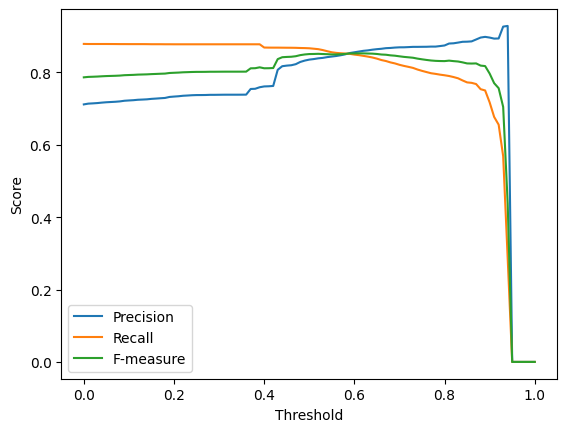

In [1792]:
thresholds = np.arange(0, 1.01, 0.01)

total_correct = len(match_resource_df)

precisions = [precision_score(resource_generated_df, t, ['e1', 'e2'], True) for t in thresholds]
recalls = [recall_score(resource_generated_df, total_correct, t) for t in thresholds]
f_measures = []
for precision, recall in zip(precisions, recalls):
    f_measure = 0
    if precision + recall > 0:
        f_measure = 2 * (precision * recall) / (precision + recall)
    f_measures.append(f_measure)
    
# Plot precision, recall, and F-measure
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f_measures, label='F-measure')

# Add labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

# Display the graph
plt.show()

In [1793]:
# Find the index of the maximum F-measure
max_f_measure_index = np.argmax(f_measures)

# Get the threshold with the maximum F-measure
best_threshold = thresholds[max_f_measure_index]
best_precision = precisions[max_f_measure_index]
best_recall = recalls[max_f_measure_index]

In [1794]:

print(best_precision)
print(best_recall)
print(max(f_measures))
print(best_threshold)

0.8577064526914076
0.8478418930530769
0.852745645525861
0.61


In [1118]:
pred_gold_df = match_df[match_df['e1'].str.contains('/property/')]

In [150]:
pred_generated_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/ma-se-pre-inv/predicate_sem_prob.csv')


In [151]:
result_df = pd.merge(pred_generated_df, pred_gold_df, left_on=['p1', 'p2'], right_on=['e1', 'e2'])

In [153]:
for index, row in tqdm(pred_generated_df.iterrows(), total=len(pred_generated_df)):
    e1 = row['p1']
    e2 = row['p2']
    
    if ((result_df['e1'] == e1) & (result_df['e2'] == e2)).any():
        pred_generated_df.at[index, 'Predicted'] = True
    else:
        pred_generated_df.at[index, 'Predicted'] = False
    
    if ((match_df['e1'] == e1) | (result_df['e2'] == e2)).any():
        pred_generated_df.at[index, 'Analyzed'] = True
    else:
        pred_generated_df.at[index, 'Analyzed'] = False

  0%|          | 0/63451 [00:00<?, ?it/s]

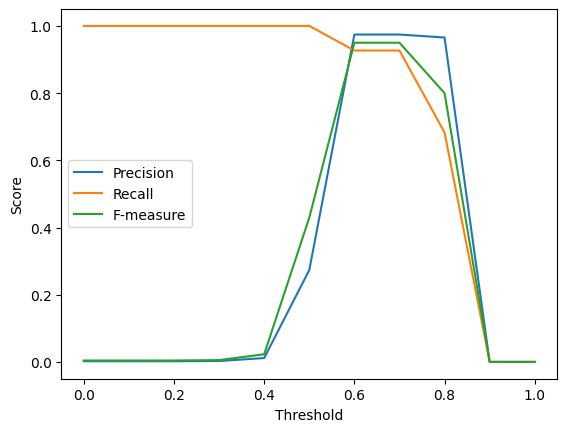

In [154]:
thresholds = np.arange(0, 1.01, 0.1)

total_correct = len(pred_gold_df)

precisions = [precision_score(pred_generated_df, t, ['p1', 'p2'], True) for t in thresholds]
recalls = [recall_score(pred_generated_df, total_correct, t) for t in thresholds]
f_measures = []
for precision, recall in zip(precisions, recalls):
    f_measure = 0
    if precision + recall > 0:
        f_measure = 2 * (precision * recall) / (precision + recall)
    f_measures.append(f_measure)
    
# Plot precision, recall, and F-measure
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f_measures, label='F-measure')

# Add labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

# Display the graph
plt.show()

In [155]:

# Find the index of the maximum F-measure
max_f_measure_index = np.argmax(f_measures)

# Get the threshold with the maximum F-measure
best_threshold = thresholds[max_f_measure_index]
best_precision = precisions[max_f_measure_index]
best_recall = recalls[max_f_measure_index]
print(best_threshold)
print(best_precision)
print(best_recall)
print(max(f_measures))

0.6000000000000001
0.9743589743589743
0.926829268292683
0.9500000000000001


In [147]:
pred_1_2 = pd.read_csv('')

pred_2_1 = pd.read_csv('')

final_pred_dict = dict()

for index, row in pred_1_2.iterrows():
    pred_1 = row['p1']
    pred_2 = row['p2']
    final_pred_dict.setdefault(pred_1, {})[pred_2] = 0.25 * row['sim']
    
for index, row in pred_2_1.iterrows():
    pred_1 = row['p2']
    pred_2 = row['p1']
    if pred_2 not in final_pred_dict.setdefault(pred_1, {}):
        final_pred_dict.setdefault(pred_1, {})[pred_2] = 0
    final_pred_dict.setdefault(pred_1, {})[pred_2] += 0.25 * row['sim']

        
for index, row in pred_generated_df.iterrows():
    pred_1 = row['p1']
    pred_2 = row['p2']
    
    if pred_2 not in final_pred_dict.setdefault(pred_1, {}):
        final_pred_dict.setdefault(pred_1, {})[pred_2] = 0
    final_pred_dict.setdefault(pred_1, {})[pred_2] += 0.5 * row['sim']
    
final_pred_list = list()

for pred_1, pred_2_dict in final_pred_dict.items():
    for pred_2 in pred_2_dict:
        final_pred_list.append({
            'p1': pred_1,
            'p2': pred_2,
            'sim': pred_2_dict[pred_2]
        })
        
final_pred_df = pd.DataFrame(final_pred_list)

result_df = pd.merge(final_pred_df, pred_gold_df, left_on=['p1', 'p2'], right_on=['e1', 'e2'])

for index, row in tqdm(final_pred_df.iterrows(), total=len(pred_generated_df)):
    e1 = row['p1']
    e2 = row['p2']
    
    if ((result_df['e1'] == e1) & (result_df['e2'] == e2)).any():
        final_pred_df.at[index, 'Predicted'] = True
    else:
        final_pred_df.at[index, 'Predicted'] = False
    
    if ((match_df['e1'] == e1) | (result_df['e2'] == e2)).any():
        final_pred_df.at[index, 'Analyzed'] = True
    else:
        final_pred_df.at[index, 'Analyzed'] = False


  0%|          | 0/63451 [00:00<?, ?it/s]

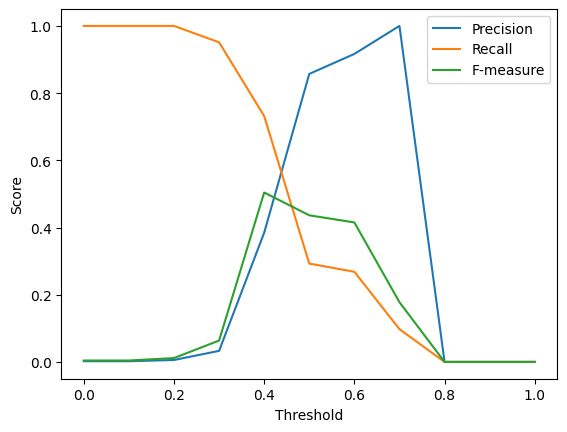

In [148]:
thresholds = np.arange(0, 1.01, 0.1)

total_correct = len(pred_gold_df)

precisions = [precision_score(final_pred_df, t, ['p1', 'p2'], True) for t in thresholds]
recalls = [recall_score(final_pred_df, total_correct, t) for t in thresholds]
f_measures = []
for precision, recall in zip(precisions, recalls):
    f_measure = 0
    if precision + recall > 0:
        f_measure = 2 * (precision * recall) / (precision + recall)
    f_measures.append(f_measure)
    
# Plot precision, recall, and F-measure
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f_measures, label='F-measure')

# Add labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

# Display the graph
plt.show()

In [149]:

# Find the index of the maximum F-measure
max_f_measure_index = np.argmax(f_measures)

# Get the threshold with the maximum F-measure
best_threshold = thresholds[max_f_measure_index]
best_precision = precisions[max_f_measure_index]
best_recall = recalls[max_f_measure_index]
print(best_threshold)
print(best_precision)
print(best_recall)
print(max(f_measures))

0.4
0.38461538461538464
0.7317073170731707
0.5042016806722689


In [82]:
class_gold_df = match_df[match_df['e1'].str.contains('/class/')]

In [81]:
class_generated_df = pd.read_csv('')


In [84]:
result_df = pd.merge(class_generated_df, class_gold_df, left_on=['c1', 'c2'], right_on=['e1', 'e2'])

In [89]:
for index, row in tqdm(class_generated_df.iterrows(), total=len(class_generated_df)):
    e1 = row['c1']
    e2 = row['c2']
    
    if ((result_df['e1'] == e1) & (result_df['e2'] == e2)).any():
        class_generated_df.at[index, 'Predicted'] = True
    else:
        class_generated_df.at[index, 'Predicted'] = False
    
    if ((match_df['e1'] == e1)).any():
        class_generated_df.at[index, 'Analyzed'] = True
    else:
        class_generated_df.at[index, 'Analyzed'] = False

  0%|          | 0/50761 [00:00<?, ?it/s]

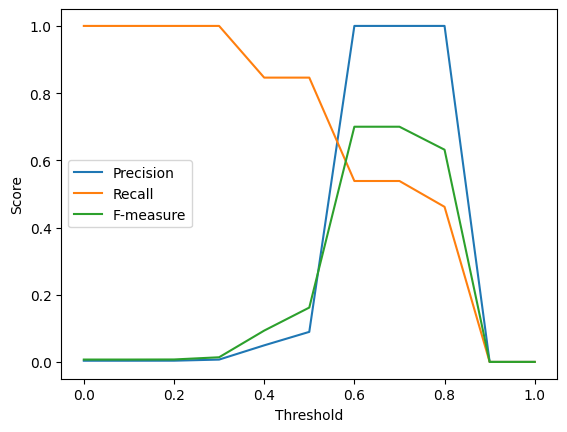

In [93]:
thresholds = np.arange(0, 1.01, 0.1)

total_correct = len(class_gold_df)

precisions = [precision_score(class_generated_df, t, ['c1', 'c2'], True) for t in thresholds]
recalls = [recall_score(class_generated_df, total_correct, t) for t in thresholds]
f_measures = []
for precision, recall in zip(precisions, recalls):
    f_measure = 0
    if precision + recall > 0:
        f_measure = 2 * (precision * recall) / (precision + recall)
    f_measures.append(f_measure)
    
# Plot precision, recall, and F-measure
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f_measures, label='F-measure')

# Add labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

# Display the graph
plt.show()

In [94]:

# Find the index of the maximum F-measure
max_f_measure_index = np.argmax(f_measures)

# Get the threshold with the maximum F-measure
best_threshold = thresholds[max_f_measure_index]
best_precision = precisions[max_f_measure_index]
best_recall = recalls[max_f_measure_index]
print(best_threshold)
print(best_precision)
print(best_recall)
print(max(f_measures))

0.6000000000000001
1.0
0.5384615384615384
0.7000000000000001


In [100]:
pred_1_2 = pd.read_csv('')

pred_2_1 = pd.read_csv('')



In [112]:
final_pred_list = list()

for pred_1, pred_2_dict in final_pred_dict.items():
    for pred_2 in pred_2_dict:
        final_pred_list.append({
            'p1': pred_1,
            'p2': pred_2,
            'sim': pred_2_dict[pred_2]
        })

In [113]:
final_pred_df = pd.DataFrame(final_pred_list)



[{'p1': 'http://dbkwik.webdatacommons.org/ontology/abstract',
  'p2': 'http://dbkwik.webdatacommons.org/ontology/abstract',
  'sim': 0.930426201718922},
 {'p1': 'http://dbkwik.webdatacommons.org/ontology/abstract',
  'p2': 'http://www.w3.org/2000/01/rdf-schema#comment',
  'sim': 0.18042620171892193},
 {'p1': 'http://www.w3.org/2004/02/skos/core#prefLabel',
  'p2': 'http://www.w3.org/2004/02/skos/core#prefLabel',
  'sim': 0.8838377121004604},
 {'p1': 'http://www.w3.org/2004/02/skos/core#prefLabel',
  'p2': 'http://dbkwik.webdatacommons.org/stexpanded.wikia.com/property/name',
  'sim': 0.0},
 {'p1': 'http://www.w3.org/2004/02/skos/core#prefLabel',
  'p2': 'http://dbkwik.webdatacommons.org/ontology/wikiPageWikiLinkText',
  'sim': 0.09438815540383642},
 {'p1': 'http://www.w3.org/2004/02/skos/core#prefLabel',
  'p2': 'http://www.w3.org/2004/02/skos/core#altLabel',
  'sim': 0.04075316447883395},
 {'p1': 'http://www.w3.org/2004/02/skos/core#prefLabel',
  'p2': 'http://dbkwik.webdatacommons.or

In [41]:
threshold_df = resource_generated_df[resource_generated_df['sim'] > 0]
    
matches = len(threshold_df)

In [42]:
matches

1040047

In [43]:
correct_matches = len(threshold_df[threshold_df['Predicted'] == True])

In [44]:
correct_matches

932

In [312]:
best_threshold_df = resource_generated_df[resource_generated_df['sim'] > best_threshold]

In [313]:
not_matched_df = pd.merge(match_df, resource_generated_df, right_on=['e1', 'e2'], left_on=['e1', 'e2'], how='left', indicator=True)




In [314]:
len(match_df)

1121

In [315]:
not_matched_df = not_matched_df[not_matched_df['_merge'] == 'left_only']

In [316]:
not_matched_df

,Unnamed: 0,e1,e2,sim,Predicted,Analyzed,_merge
1,1,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Temple_of_the_Blueleaf_Cluster,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Temple_of_the_Blueleaf,NaN,NaN,NaN,left_only
10,10,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Nightsister_melee_armguard,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Nightsister_Melee_Armguard,NaN,NaN,NaN,left_only
12,12,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Orden_Tarc,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Lieutenant_Orden_Tarc,NaN,NaN,NaN,left_only
18,18,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/It_Came_From_Mustafar!,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/It_came_from_Mustafar_!,NaN,NaN,NaN,left_only
20,20,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Srimaur,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Tusken_Scholar,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...
1103,1103,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Reimos_Taligg,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Find_Reimos,NaN,NaN,NaN,left_only
1105,1105,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Hoth_chocolate,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Decorative_Hoth_Chocolate,NaN,NaN,NaN,left_only
1110,1110,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Rancor,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Rancor,NaN,NaN,NaN,left_only
1111,1111,http://dbkwik.webdatacommons.org/starwars.wikia.com/resource/Dinge,http://dbkwik.webdatacommons.org/swg.wikia.com/resource/Captain_Dinge,NaN,NaN,NaN,left_only


In [317]:
not_matched_df.to_csv('/Users/yamamotobikutorueiichi/codes/paris/sww-swg/not_matched.csv')

In [235]:
threshold_one_to_one_df.to_csv("/Users/yamamotobikutorueiichi/codes/custom_paris/ma-se-pre-calc-pred/one_to_one.csv")

In [46]:
FILTERED_BERT = "/Users/yamamotobikutorueiichi/codes/custom_paris/ma-se-pre-calc-pred/bert_filtered.csv"
RESULT_RW = "/Users/yamamotobikutorueiichi/codes/custom_paris/memoryalpha-startrek/sema_rw_only_bert.csv"


In [2]:
match_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/ma-se-gold.csv')

In [47]:
match_df

,Unnamed: 0,ma,se
0,0,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/USS_Cochrane,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/USS_Cochrane_(NCC-59318)
1,1,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/University,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/University
2,2,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Martian,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Martian
3,3,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Terrorism,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Terrorism
4,4,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Flagship,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Flagship
...,...,...,...
1774,1774,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Odo,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Odo
1775,1775,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Ceti_Alpha_V,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Ceti_Alpha_V
1776,1776,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Starbase_371,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Starbase_371
1777,1777,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Tanker,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Tanker


In [48]:
bert_result_df = pd.read_csv(FILTERED_BERT)

In [49]:
bert_result_df

,Unnamed: 0.1,Unnamed: 0,e1,e2,sim,cosine_distance
0,47214,47214,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Federation_starship_classes,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Federation_starship_classes,1.000000,1.000000
1,53308,53308,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Non-corporeal_species,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/USS_Enterprise_(NCC-1701)_personnel,1.000000,1.000000
2,45909,45909,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Flight_controller,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Flight_controller,1.000000,0.946896
3,48816,48816,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Vosk,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Vosk,1.000000,1.000000
4,2294,2294,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/United_Federation_of_Planets,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/United_Federation_of_Planets,1.000000,0.000000
...,...,...,...,...,...,...
3194,53768,53768,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Gates,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/USS_Gates,0.953846,0.682208
3195,38541,38541,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/USS_Bellerophon,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Bellerophon,0.953846,0.000000
3196,53740,53740,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/USS_Excelsior_personnel,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/USS_Excelsior_(prototype)_personnel,0.953846,0.912508
3197,53656,53656,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Hylanatine,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Mijanou_Syndrome,0.953846,0.698290


In [50]:
threshold_bert_result_df = bert_result_df[bert_result_df['cosine_distance'] > 0.7]

In [51]:
threshold_bert_result_df

,Unnamed: 0.1,Unnamed: 0,e1,e2,sim,cosine_distance
0,47214,47214,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Federation_starship_classes,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Federation_starship_classes,1.000000,1.000000
1,53308,53308,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Non-corporeal_species,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/USS_Enterprise_(NCC-1701)_personnel,1.000000,1.000000
2,45909,45909,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Flight_controller,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Flight_controller,1.000000,0.946896
3,48816,48816,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Vosk,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Vosk,1.000000,1.000000
5,43860,43860,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/United_States_of_America,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/United_States_of_America,1.000000,0.917913
...,...,...,...,...,...,...
3182,53334,53334,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Terran_(mirror),http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Mirror_universe_cultures,0.953846,0.725560
3183,53490,53490,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Cricket,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Cricket_(sport),0.953846,0.704316
3184,53478,53478,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Lee_Kuan,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Li_Qan,0.953846,0.787090
3196,53740,53740,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/USS_Excelsior_personnel,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/USS_Excelsior_(prototype)_personnel,0.953846,0.912508


In [57]:
result_df = pd.merge(threshold_bert_result_df, match_df, left_on=['e1', 'e2'], right_on=['ma', 'se'])

In [59]:
result_df

,Unnamed: 0.1,Unnamed: 0_x,e1,e2,sim,cosine_distance,Unnamed: 0_y,ma,se
0,45909,45909,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Flight_controller,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Flight_controller,1.000000,0.946896,1021,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Flight_controller,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Flight_controller
1,48816,48816,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Vosk,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Vosk,1.000000,1.000000,310,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Vosk,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Vosk
2,43860,43860,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/United_States_of_America,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/United_States_of_America,1.000000,0.917913,673,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/United_States_of_America,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/United_States_of_America
3,4353,4353,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Romulan_Star_Empire,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Romulan_Star_Empire,1.000000,0.946769,382,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Romulan_Star_Empire,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Romulan_Star_Empire
4,44609,44609,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/First_officer,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/First_officer,1.000000,0.893918,669,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/First_officer,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/First_officer
...,...,...,...,...,...,...,...,...,...
1402,45577,45577,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/New_Providence_colony,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/New_Providence,0.964515,0.984055,52,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/New_Providence_colony,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/New_Providence
1403,46180,46180,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Preantares_Ribbon_of_Commendation,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Prentares_Ribbon_of_Commendation,0.964515,0.932273,602,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Preantares_Ribbon_of_Commendation,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Prentares_Ribbon_of_Commendation
1404,46386,46386,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Yoyodyne_Propulsion_Systems,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Yoyodyne_Division,0.964515,0.913962,153,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Yoyodyne_Propulsion_Systems,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Yoyodyne_Division
1405,53573,53573,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Soccer,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Football_(soccer),0.953846,0.900421,1710,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Soccer,http://dbkwik.webdatacommons.org/stexpanded.wikia.com/resource/Football_(soccer)


In [209]:
not_matched_df = pd.merge(threshold_bert_result_df, match_df, left_on=['e1', 'e2'], right_on=['ma', 'se'], how='left', indicator=True)

In [210]:
not_matched_df = not_matched_df[not_matched_df['_merge'] == 'left_only']

In [213]:
not_matched_df.to_csv('wrongly_matched.csv')

In [19]:
rw_df = pd.read_csv(RESULT_RW)

In [20]:
rw_df

,Unnamed: 0,e1,e2
0,0,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....
1,1,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....
2,2,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....
3,3,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....
4,4,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....
...,...,...,...
1539,1539,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....
1540,1540,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....
1541,1541,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....
1542,1542,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....


In [21]:
total_df = rw_df.append(threshold_bert_result_df)

/var/folders/6f/k2t20zbs4db5khp6mgdq_06m0000gn/T/ipykernel_25607/2200280518.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_df = rw_df.append(threshold_bert_result_df)


In [22]:
total_df = total_df.drop_duplicates('e1').drop_duplicates('e2')

In [23]:
total_df

,Unnamed: 0,e1,e2,Unnamed: 0.1,sim,cosine_distance
0,0,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,NaN,NaN,NaN
1,1,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,NaN,NaN,NaN
2,2,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,NaN,NaN,NaN
3,3,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,NaN,NaN,NaN
4,4,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,NaN,NaN,NaN
...,...,...,...,...,...,...
6931,614200,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,614200.0,0.963177,0.821755
6932,614198,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,614198.0,0.963177,0.768095
6934,916460,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,916460.0,0.960896,0.851225
6948,902926,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,902926.0,0.955880,0.757170


In [24]:
result_df = pd.merge(total_df, match_df, left_on=['e1', 'e2'], right_on=['se', 'ma'])

In [25]:
result_df

,Unnamed: 0_x,e1,e2,Unnamed: 0.1,sim,cosine_distance,Unnamed: 0_y,ma,se
0,0,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,NaN,NaN,NaN,1684,http://dbkwik.webdatacommons.org/memory-alpha....,http://dbkwik.webdatacommons.org/stexpanded.wi...
1,4,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,NaN,NaN,NaN,616,http://dbkwik.webdatacommons.org/memory-alpha....,http://dbkwik.webdatacommons.org/stexpanded.wi...
2,5,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,NaN,NaN,NaN,75,http://dbkwik.webdatacommons.org/memory-alpha....,http://dbkwik.webdatacommons.org/stexpanded.wi...
3,6,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,NaN,NaN,NaN,373,http://dbkwik.webdatacommons.org/memory-alpha....,http://dbkwik.webdatacommons.org/stexpanded.wi...
4,8,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,NaN,NaN,NaN,591,http://dbkwik.webdatacommons.org/memory-alpha....,http://dbkwik.webdatacommons.org/stexpanded.wi...
...,...,...,...,...,...,...,...,...,...
1386,611224,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,611224.0,0.994142,0.906830,152,http://dbkwik.webdatacommons.org/memory-alpha....,http://dbkwik.webdatacommons.org/stexpanded.wi...
1387,611220,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,611220.0,0.994142,0.901157,1436,http://dbkwik.webdatacommons.org/memory-alpha....,http://dbkwik.webdatacommons.org/stexpanded.wi...
1388,611213,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,611213.0,0.994142,0.979411,1345,http://dbkwik.webdatacommons.org/memory-alpha....,http://dbkwik.webdatacommons.org/stexpanded.wi...
1389,613597,http://dbkwik.webdatacommons.org/stexpanded.wi...,http://dbkwik.webdatacommons.org/memory-alpha....,613597.0,0.994142,0.933897,398,http://dbkwik.webdatacommons.org/memory-alpha....,http://dbkwik.webdatacommons.org/stexpanded.wi...


ModuleNotFoundError: No module named 'graph_similarity'